In [67]:
import pickle

with open("C:/Users/timv/Git/SpaceSalmon/sim/filter_sim_data.pkl", 'rb') as f:
    sim = pickle.load(f)
    
sim

[array([3.90000e-02, 5.80000e-02, 7.20000e-02, ..., 1.99938e+02,
        1.99960e+02, 1.99979e+02]),
 array([642.99677045, 643.00128726, 642.99400727, ..., 637.67240786,
        637.72403166, 637.74749723]),
 array([ 6.47198101e-03,  4.09711687e-02,  8.76758751e-02, ...,
        -6.76301998e+00, -6.59639457e+00, -6.53356969e+00])]

line not JSON
line not JSON
line not JSON
Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


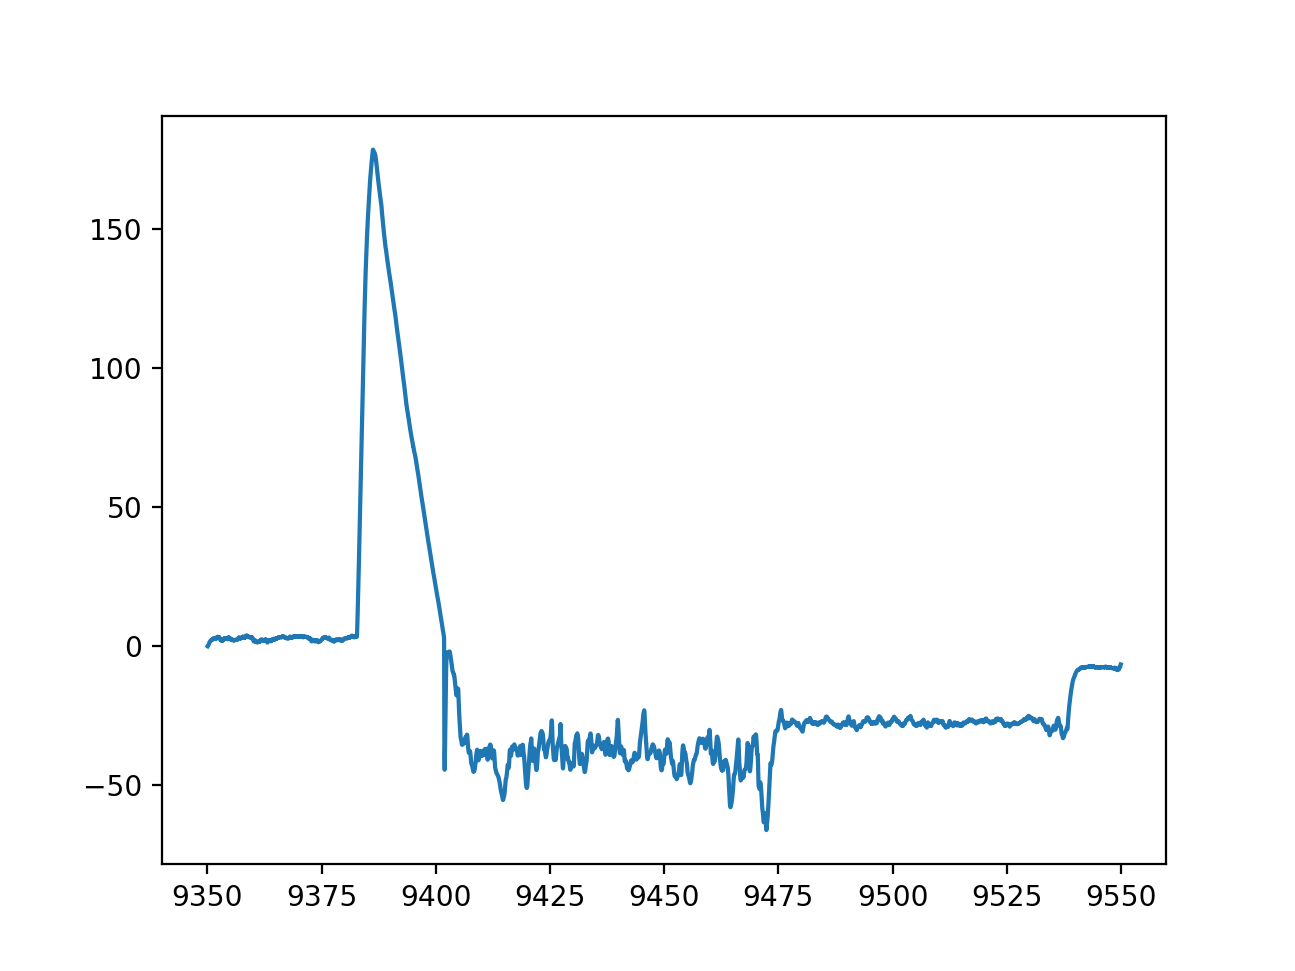

<IPython.core.display.Javascript object>


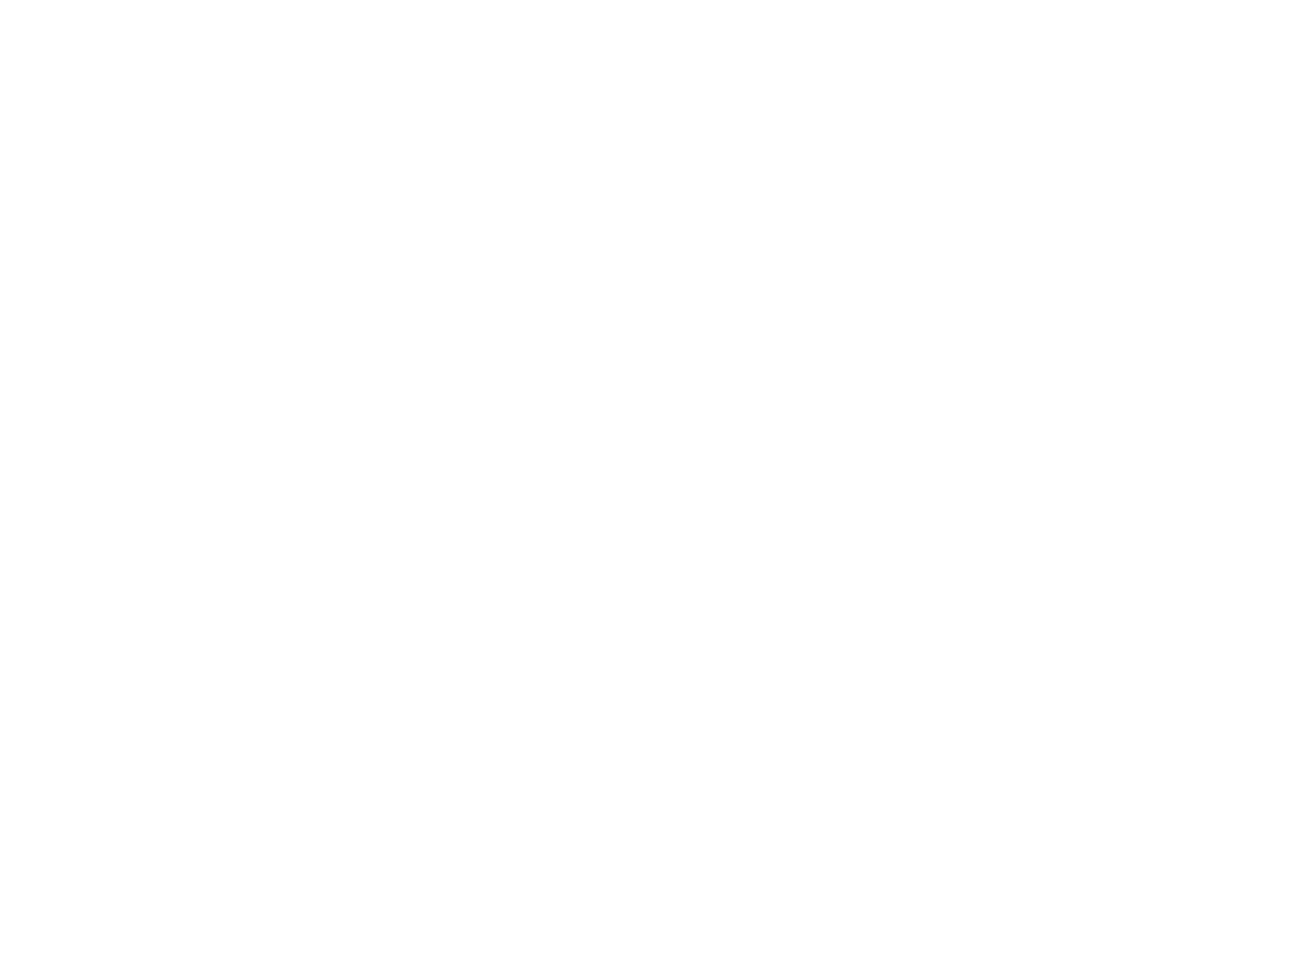

array([3.90000e-02, 5.80000e-02, 7.20000e-02, ..., 1.99938e+02,
       1.99960e+02, 1.99979e+02])

In [73]:
import json
import sys
import matplotlib.pyplot as plt
file = open("log24.txt")

def flatten(data, prefix=""):
    flat = dict()
    
    if isinstance(data,dict):
        if prefix:
            prefix += "."
        for k,v in data.items():
            flat.update(flatten(v, prefix + str(k)))
        return flat;
    
    if isinstance(data,list):
        if prefix:
            prefix += "."
        i = 0;
        for v in data:
            flat.update(flatten(v, prefix + str(i)))
            i += 1
        return flat
    
    return {prefix:data}



json_body = []

id = []
stack = []
bat = {"cellA":[],"cellB":[]}
for line in file:
    try:
        data = json.loads(line)
        if data["id"] == "filter_state":
            try:
                
                flat = flatten(data)
                flat["id"] = 0.0 #Need to handle enumerated states!
                flt = dict()
                
                for key in flat:
                    flt[key] = float(flat[key])
                
                json_body += [flt]
                
                
            except KeyError:
                print('keyError')
                print(line)
        #if data[u"id"] == u"status":
            #tick_stat.append(data[u"tick"])
            #bat["cell"].append(data[u'bat'][u"cell"])
            
    except ValueError:
        print('line not JSON')
file.close()



data = [[data[key] for data in json_body] for key in ["tick","x.0","x.1","z.0","z.1"]]

%matplotlib

#fig, ax1 = plt.subplots()

data[0] = [(a)/1000 for a in data[0]]

plt.plot(data[0],data[2])
#plt.plot(sim[0],sim[2])
#ax2 = ax1.twinx()
#ax2.plot(data[0],data[2])

plt.figure()

#plt.plot(data[0],data[3])
#plt.plot(data[0],data[4])

sim[0]